In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease


In [2]:
df = pd.read_csv('../DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

### Data Analysis 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


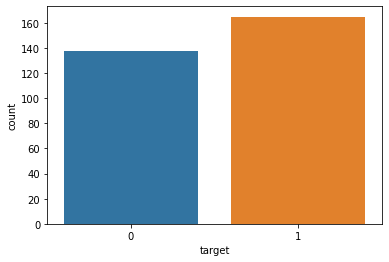

In [8]:
sns.countplot(x='target',data=df);

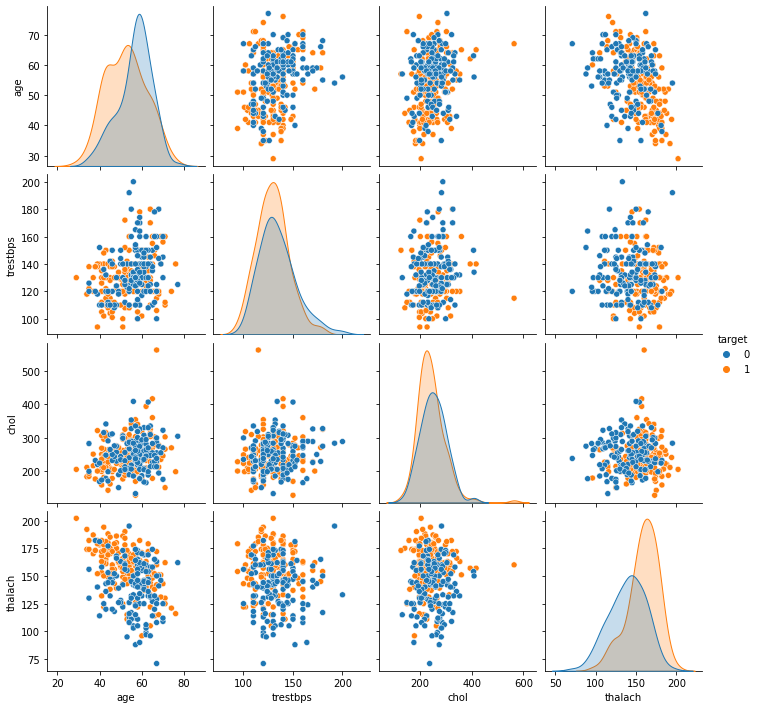

In [9]:
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']],hue='target');

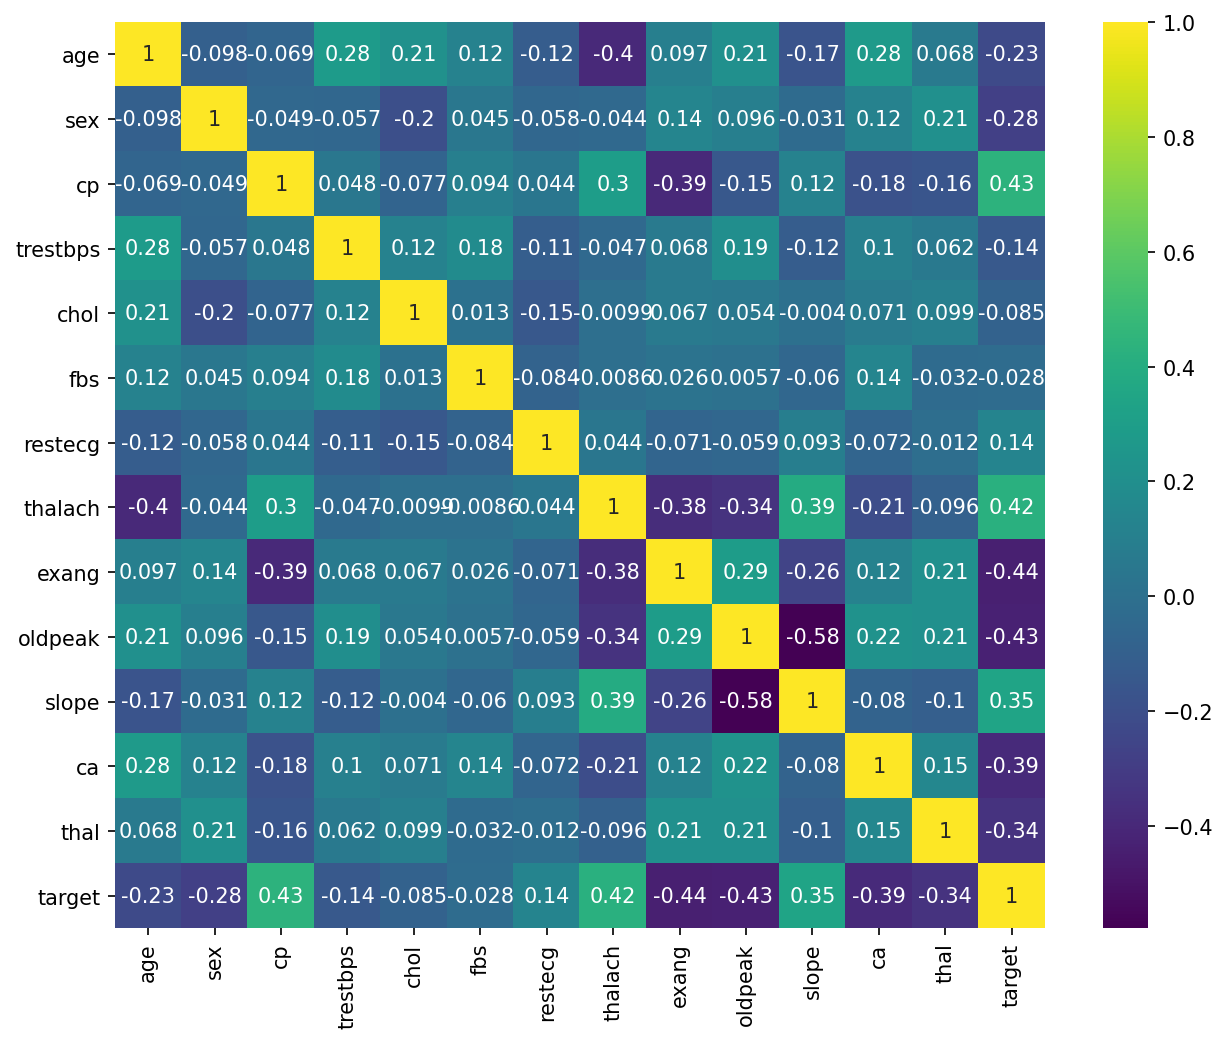

In [10]:
plt.figure(figsize=(10,8),dpi=150)
sns.heatmap(df.corr(),annot=True,cmap='viridis');

## Machine Learning 

## train|test split and scaling data

In [11]:
X = df.drop('target',axis=1)
y = df['target']

In [12]:
X.shape

(303, 13)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [18]:
scaledX_test.shape

(31, 13)

## Logistic Regression model 

In [19]:
from sklearn.linear_model import LogisticRegressionCV

In [20]:
log_model = LogisticRegressionCV(cv=5,penalty='elasticnet',solver='saga',max_iter=1000,l1_ratios=[0,0.1,0.5,0.9,1])

In [21]:
log_model.fit(scaledX_train,y_train)

LogisticRegressionCV(cv=5, l1_ratios=[0, 0.1, 0.5, 0.9, 1], max_iter=1000,
                     penalty='elasticnet', solver='saga')

In [25]:
log_model.l1_ratio_

array([0])

In [32]:
log_model.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [33]:
log_model.C_

array([0.04641589])

In [34]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': [0, 0.1, 0.5, 0.9, 1],
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0}

In [35]:
log_model.coef_

array([[-0.09618617, -0.39459096,  0.53533886, -0.13848807, -0.0883287 ,
         0.02487228,  0.08085074,  0.29914136, -0.33437144, -0.352363  ,
         0.2509823 , -0.49737368, -0.37446587]])

In [36]:
coef=log_model.coef_

In [37]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [39]:
coefs = coefs.sort_values()

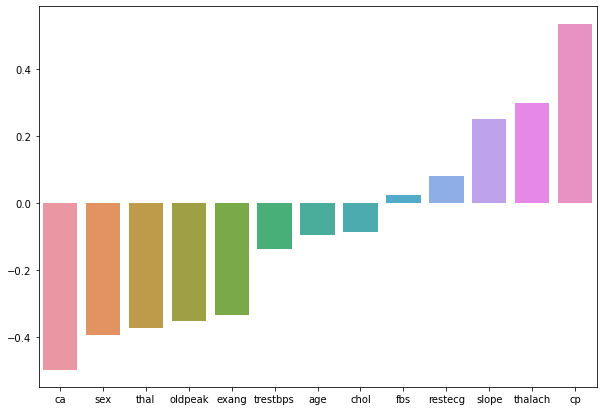

In [41]:
plt.figure(figsize=(10,7))
sns.barplot(y=coefs.values,x=coefs.index);

## Model performance evaluation.

In [42]:
y_pred = log_model.predict(scaledX_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [44]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

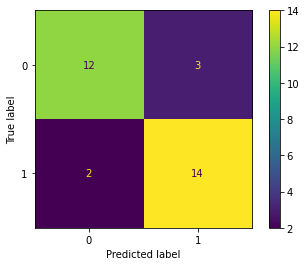

In [45]:
plot_confusion_matrix(log_model,scaledX_test,y_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



## Performance curves

In [47]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

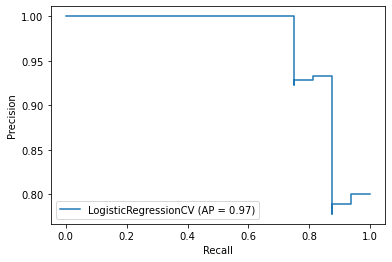

In [48]:
plot_precision_recall_curve(log_model,scaledX_test,y_test)

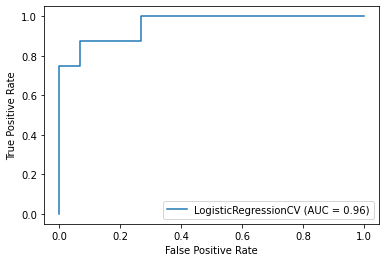

In [49]:
plot_roc_curve(log_model,scaledX_test,y_test)

## Making prediction based on some values 

In [50]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [51]:
log_model.predict(patient)

array([0], dtype=int64)

In [52]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.37957341e-07]])